## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#append path with python modules
import importlib
import sys
sys.path.append("drive/MyDrive/modules")

#Private functions
import plotting_function as plf
importlib.reload(plf);

#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

ModuleNotFoundError: No module named 'plotting_function'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

Dane w postaci pary macierzy `x,y` są mało wydajne w sytuacji gdy jest ich dużo lub są rozmieszczone w wielu plikach.
TF dostarcza dedykowaną klasę do obsługi strumienia wejścia:
```Python
tf.data.Dataset(variant_tensor)
```

Klasa `tf.Dataset` pozwala na zaawansowane operacje na danych. Implementacja tych operacji korzysta równoległego przetwarzania danych w celu zwiększenia przepustowości strumienia wejścia: `liczby przykładów na sekundę`.



Obiekt `tf.Dataset` można tworzyć na wiele sposobów:

* z macierzy:

```Python
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
```

* z funkcji typu generator

```Python
dataset = tf.data.Dataset.from_generator(...)
```

* z pliku typu CSV

```Python
dataset = tf.data.TextLineDataset(...)
```

* z pliku zawierającego dane w dedykowanym formacie `TFRecord`

```Python
dataset = tf.data.TFRecordDataset(["file1.tfrecords", "file2.tfrecords"])
```



Konstrukcja `tf.data.Dataset` z macierzy NumPy

In [ ]:
nExamples = 5
nFeatures = 3
epsilon = 0.01
x = tf.random.uniform((nExamples, nFeatures), minval=-1, maxval=1, dtype=tf.float32, name="features")
y = tf.math.reduce_sum(x**2, axis=1)
y = tf.reshape(y, (-1, 1))

print(colored("Features shape:", "blue"), x.shape)
print(colored("Labels shape:", "blue"), y.shape)

dataset = tf.data.Dataset.from_tensor_slices((x, y))
print(dataset)
print(colored("Dataset lenght:", "blue"), len(dataset))

Features shape: (5, 3)
Labels shape: (5, 1)
<_TensorSliceDataset element_spec=(TensorSpec(shape=(3,), dtype=tf.float32, name=None), TensorSpec(shape=(1,), dtype=tf.float32, name=None))>
Dataset lenght: 5


`tf.Dataset` zachowuje się jak kolekcja - można po niej iterować łatwo dostosowując liczbę analizowanych elementów i punkt startowy:

In [ ]:
print(colored("Iteration over the full dataset", "blue"))
for item in dataset:
    print(item)

print(colored("Iteration over n elements", "blue"))
n = 3
for item in dataset.take(n):
    print(item)

print(colored("Iteration over n elements starting from m", "blue"))
n = 3
m = 2
for item in dataset.skip(m).take(n):
    print(item)

Iteration over the full dataset
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.89507794,  0.5313778 ,  0.8816781 ], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.8608831], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.8576176,  0.7598381, -0.9311154], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.1798377], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.3130877 , -0.5384557 , -0.05324745], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.39079377], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.3585391 , -0.0998795 ,  0.82894707], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8256794], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.20897245, -0.85375595,  0.8225441 ], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.4491475], dtype=float32)>)
Iteration over 

Konstrukcja `tf.Dataset` z funkcji generującej.

W tym wypadku oprócz funkcji generującej musimy podać informacje o kształcie i typie danych generowanych przez funkcję:
```Python
dataset = tf.data.Dataset.from_generator(
         generator,                                      # funkcja generująca
         output_signature=(                              # opis kształtu i typu
             (tf.TensorSpec(shape=(3), dtype=tf.float32),# danych generowanych
             tf.TensorSpec(shape=(1), dtype=tf.int32)))  # przez funkcję
    )
```

In [ ]:
#Generator function definition
nFeatures = 3

def points3DGenerator():
    while True:
        x = tf.random.uniform(shape=(nFeatures,), minval=-1, maxval=1, dtype=tf.float32, name="features")
        y = tf.math.reduce_sum(x**2, axis=0)
        y = tf.reshape(y, (1))
        yield x,y

#Dataset from generator
dataset = tf.data.Dataset.from_generator(points3DGenerator,
         output_signature=(
             (tf.TensorSpec(shape=(nFeatures,), dtype=tf.float32, name="features"),
             tf.TensorSpec(shape=(1), dtype=tf.float32, name="labels")))
    )


In [ ]:
print(colored("Iteration over n elements starting from m", "blue"))
n = 3
m = 2
for item in dataset.skip(m).take(n):
    print(item)

Iteration over n elements starting from m
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.8019123,  0.7699554, -0.2759738], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.3120562], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.6539624 , -0.79062676, -0.8651972 ], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.8013237], dtype=float32)>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.073596  , 0.6784451 , 0.87141705], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.2250718], dtype=float32)>)


Na zbiorze `tf.Dataset` można wykonywać różne operacje przekształcenia:

```Python
dataset = dataset.repeat(n) - # powtarza dane n razy
                              # W sytuacji gdy nie podano argumentu
                              # dane są powtarzane w nieskończoność.
```

**Uwaga:** nie trzeba używać `repeat` by uzyskać wiele epok w czasie treningu. Funkcja `model.fit(...)`
sama zarządza wielokrotnymi przejściami przez zbiór danych

```Python
dataset = dataset.batch(n)   - # grupowanie zbioru w paczki.
                               # W czasie treningu paczki są automatycznie
                               # rozpoznane i nie trzeba (nie wolno) podawać
                               # rozmiaru paczki explicite.
```

```Python
dataset = dataset.skip(m)    - # opuszcza pierwsze m przykładów
                              
```

```Python
dataset = dataset.take(n)    - # ogranicza zbiór do pierwszych n przykładów
                              
```

```Python
dataset = dataset.skip(m).take(n)    - # opuszcza pierwsze m, i bierze
                                       # kolejne n przykładów
                              
```

In [ ]:
dataset_batched = dataset.batch(2)

#Access a single example (batch in this case)
it = iter(dataset_batched)
print(colored("Features shape:", "blue"), next(it)[0].numpy().shape)
print(colored("Labels shape:", "blue"), next(it)[1].numpy().shape)

print(colored("Iteration over n elements starting from m", "blue"))
m = 5
n = 1
for item in dataset_batched.skip(m).take(n):
    print(colored("\tLabels:","blue"),item[0].numpy())
    print(colored("\tFeatures:","blue"),item[1].numpy())

Features shape: (2, 3)
Labels shape: (2, 1)
Iteration over n elements starting from m
	Labels: [[ 0.35701227 -0.05302358  0.46648073]
 [-0.50162244 -0.9949095   0.5223174 ]]
	Features: [[0.34787357]
 [1.5142856 ]]


Zbiór danych można poddać też ogólnej transformacji zmieniającej zawartość poszczególnych wierszy:
```Python
dataset_transformed = dataset.map(func) # func to funkcja przyjmująca dany wiersz i zwracająca nowy
```

In [ ]:
def func(features, label):
    return features**2, label

dataset_transformed = dataset.map(func)

print(colored("Iteration over original dataset", "blue"))
for item in dataset.skip(m).take(n):
    print(colored("\tLabels:","blue"),item[0].numpy())
    print(colored("\tFeatures:","blue"),item[1].numpy())

print(colored("Iteration over transformed dataset", "blue"))
for item in dataset_transformed.skip(m).take(n):
    print(colored("\tLabels:","blue"),item[0].numpy())
    print(colored("\tFeatures:","blue"),item[1].numpy())

Iteration over original dataset
	Labels: [ 0.90129733 -0.00358629 -0.86381125]
	Features: [1.5585196]
Iteration over transformed dataset
	Labels: [0.01018494 0.50839597 0.02589445]
	Features: [0.5444754]


**Proszę:**

* skopiować funkcję `discGenerator` z poprzednich zajęć
* stworzyć zbiór `tf.Dataset` obrazów kół korzystając bezpośrednio z generatora. Proszę przyjąć rozdzielczość 256 $\times$ 256

In [ ]:
def discGenerator(res=256):

    from skimage.draw import disk
    while True:
        center = tf.random.uniform([2], minval=0, maxval = res, dtype=tf.int32, name='center')
        radius = tf.random.uniform([1], minval=5, maxval = res//2, dtype=tf.int32, name='radius')
        shape = (res, res)
        image = np.full(shape, 0)
        yy, xx = disk(center=center.numpy(), radius=radius.numpy()[0], shape=shape)
        image[xx,yy] = 1
        features = tf.concat(values=(center, radius), axis=0 )
        label = tf.constant(image, dtype=tf.int32, name='image')
        label = tf.reshape(label, (res, res, 1))
        yield  features, label


features = 3
res = 256

disc_dataset = tf.data.Dataset.from_generator(discGenerator,
         output_signature=(
             (tf.TensorSpec(shape=(features), dtype=tf.int32),
             tf.TensorSpec(shape=(res,res,1), dtype=tf.int32)))
    )

item = next(iter(dataset))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (3,)
Labels shape: (1,)


**Proszę:**

* napisać funkcję `reading_benchmark(dataset)` która przyjmuje zbiór danych, iteruje po całym zbiorze i oblicza i
   wypisuje na ekran swój czas wykonania
* w iteracjach po elementach zbioru proszę wstawić krótki postój:
```Python
time.sleep(1E-10)
```
* proszę wywołać funkcję na zbiorze który ma $10^{4}$ elementów i zarejestrować czas przebiegu po zbiorze

In [ ]:
import time

def reading_benchmark(dataset):
  start_time = time.time()
  for sample in dataset:
    time.sleep(1E-10)
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("Time for iterating all data  [s]: ", elapsed_time)

reading_benchmark(disc_dataset.take(int(1E3)))
pass

Time for iterating all data  [s]:  2.6108739376068115


Generacja danych za każdym razem kiedy jest wywoływana iteracja po zbiorze jest kosztowana -
lepiej wygenerować dane raz i je zapisać w pamięci podręcznej. To samo dotyczy zbiorów czytanych z dysku i
poddawanych kosztownym operacjom przekształcania. Zapisywanie zbioru w tymczasowym pliku można uzyskać przez metodę `cache`:
```Python
dataset_cached = dataset.cache()
```

**Proszę:**

* wywołać dwa razy funkcję `reading_benchmark` na zbiorze `dataset_cached`
* czy jest jakaś różnica w czasie wykonania?
* jeśli tak, to skąd się ona bierze?

In [ ]:
disc_dataset_cached = disc_dataset.take(int(1E3)).cache()

print("First pass: ")
reading_benchmark(disc_dataset_cached)
print("Second pass: ")
reading_benchmark(disc_dataset_cached)
pass

First pass: 
Time for iterating all data  [s]:  5.1213390827178955
Second pass: 
Time for iterating all data  [s]:  0.37666797637939453


Każdy wiersz danych w postaci `tf.Dataset` powinien zawierać cechy i etykiety by można go było przekazać do funkcji trenującej model:
```Python
model.fit(dataset, ...)  #Podajemy tylko tf.Dataset.
                         #Metoda model.fit(...) sama rozkłada każdy wiersz na cechy i etykiety
```

Jeśli `tf.Dataset` pochodzi z generatora, jako dane walidacyjne najlepiej podać nowy zbiór.
W tej sytuacji trzeba także podać liczbę przykładów dla obu zbiorów:

```Python
model.fit(dataset.batch(batchSize).take(nStepsPerEpoch),
          epochs=nEpochs,
          validation_data=dataset.batch(batchSize).map(mapFunc).take(100))
```

**Proszę:**

* wytrenować **minimalny** model obliczający kwadrat odległości punktu od środka układu współrzędnych
* jako zbiorów uczacego, walidacyjnego i testowego proszę użyć obiektów `tf.Dataset` wypełnionych z użyciem generatora `points3DGenerator(...)`
* użyć funkcji przekształcającej etykietę do wymaganej postaci z użyciem `tf.Dataset.map(...)`
* przyjąć następujące parametry treningu:
```Python
nEpochs = 5
nStepsPerEpoch = 4096
batchSize = 32
initial_learning_rate = 5E-2
```
* narysować historię treningu
* wypisać wagi modelu w sposób pozwalający na interpretację
* obliczyć ułamek przykładów ze zbioru testowego dla którego wynik modelu różni się od etykiety o nie więcej niż 1%

**Wskazówka:**
wartości etykiet można wydobyć w następujący (suboptymalny) sposób:
```Python
y = np.array([y.numpy() for x,y in dataset_test.unbatch()])
```

**Uwaga:** trening powinien zająć około 3'

Czy wynik na zbiorze testowym jest zgodny z oczekiwaniem?

1) Przygotowanie danych z generatora.

In [ ]:
dataset = tf.data.Dataset.from_generator(points3DGenerator,
         output_signature=(
             (tf.TensorSpec(shape=(nFeatures,), dtype=tf.float32, name="features"),
             tf.TensorSpec(shape=(1), dtype=tf.float32, name="labels")))
    )
item = next(iter(dataset))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (3,)
Labels shape: (1,)


2) przygotowanie danych

* podział na paczki
* modyfikacja zawartości danych z użyciem `dataset.map(...)`.
* przygotowanie odpowiedniej liczby przykładów
* buforowanie


In [ ]:
nStepsPerEpoch = 4096
batchSize = 32
nEpochs = 5
dataset_cached = dataset.batch(batchSize).map(func).take(nStepsPerEpoch).cache()

#Najbardziej optymalna kolejność: batch -> map -> take -> cache

item = next(iter(dataset_cached))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (32, 3)
Labels shape: (32, 1)


3) definicja modelu

In [ ]:
def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):
  inputs = tf.keras.Input(shape=inputShape, name="features")
  x = inputs
  for i,n in enumerate(nNeurons):
    x = tf.keras.layers.Dense(n,
                              activation=hiddenActivation,
                              name="layer_%i"%i,
                              kernel_initializer="HeNormal",
                              bias_initializer=tf.keras.initializers.RandomUniform(minval=-1.0,maxval=1.0),
                              kernel_regularizer=tf.keras.regularizers.L2(l2=0.01),
                              )(x)
  outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name="output")(x)
  model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
  return model
model = getModel((3,), np.array([]))
model.summary()

initial_learning_rate = 5E-2
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=initial_learning_rate,
                                                            decay_steps=3,
                                                            decay_rate=0.95,
                                                            staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[])

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-3)
callbacks = [early_stop_callback]

history = model.fit(dataset_cached.skip(batchSize*4),
                    epochs=nEpochs,
                    validation_data=dataset_cached.take(batchSize*4),
                    callbacks=[early_stop_callback],
                    verbose=1)

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 3)]               0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3840/3840 [==============================] - 319s 78ms/step - loss: 0.1956 - val_loss: 0.0211
Epoch 2/10
3840/3840 [==============================] - 10s 3ms/step - loss: 0.0063 - val_loss: 3.6665e-04
Epoch 3/10
3840/3840 [==============================] - 9s 2ms/step - loss: 5.5741e-05 - val_loss: 2.8069e-08
Epoch 4/10
3840/3840 [==============================] - 10s 3ms/step - loss: 1.8204e-09 - val_loss: 2.261

4) trening ze wszystkimi standardowymi elementami:
* harmonogram współczynnika uczenia
* wczesne zatrzymanie
* wykres zmiany funkcji straty

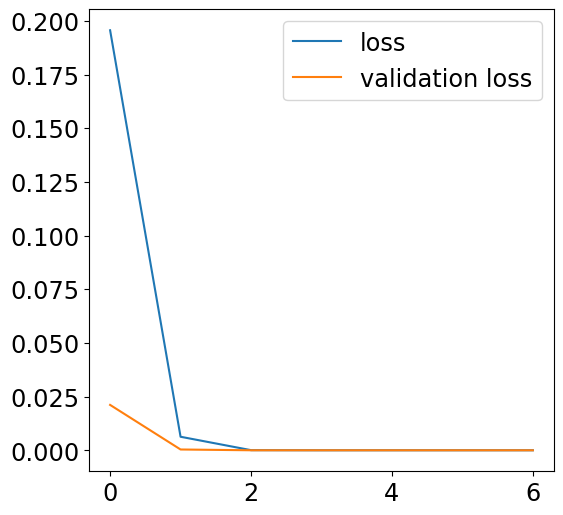

In [ ]:
def plotTrainingHistory(history):
  fig, ax = plt.subplots(1, 1, figsize = (6, 6))
  ax.plot(history.history['loss'], label = 'loss')
  ax.plot(history.history['val_loss'], label = 'validation loss')
  ax.legend()

plotTrainingHistory(history)
pass


5) oszacowanie wydajności modelu na danych testowych

In [ ]:
nTesting = 128
test_dataset_cached = dataset.batch(batchSize).map(func).take(nTesting).cache()
results = model.evaluate(test_dataset_cached, verbose = 1)

print(results)
print(model.get_weights())

pass

16/16 [==============================] - 1s 70ms/step - loss: 7.3770e-15
7.376979344227153e-15
[array([[0.9999999],
       [0.9999999],
       [0.9999998]], dtype=float32), array([1.3737166e-07], dtype=float32)]


In [ ]:
y = np.array([y.numpy() for x,y in test_dataset_cached.unbatch()])

y_pred = model.predict(test_dataset_cached, verbose = 1)

delta = np.absolute((y - y_pred)/y)

delta = delta.flatten()
threshold = 1E-2

print(np.mean(np.absolute(delta)<threshold))
print(delta.std())


16/16 [==============================] - 0s 2ms/step
1.0
5.6638464e-07


**Proszę:**

* rozwiązać problem z różnicą wyników na zbiorach treningowym i testowym
* narysować histogram różnicy względnej:

$$
{\huge
\mathrm{pull} = \frac{\mathrm{model} - \mathrm{true}}{\mathrm{true}}
}
$$

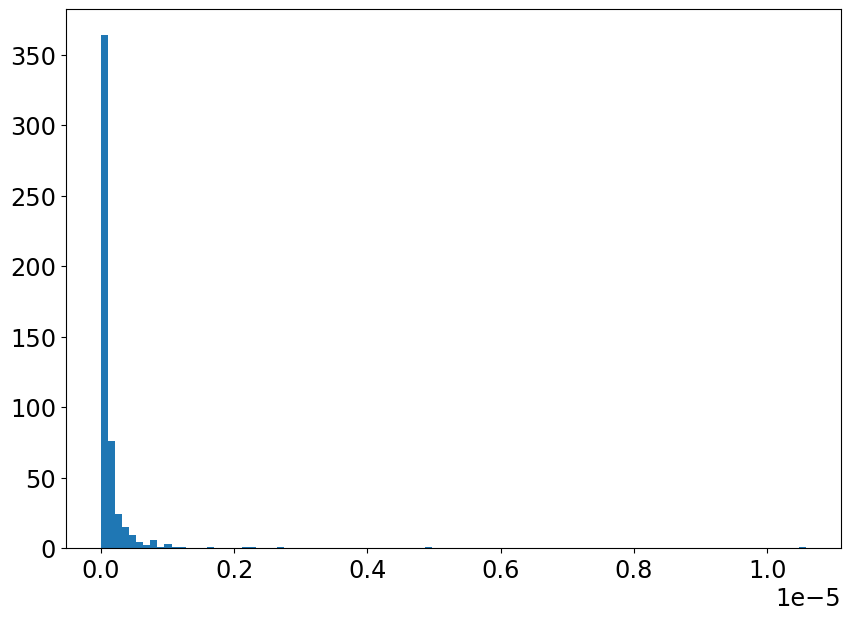

In [ ]:
plt.subplot(1, 1, 1)
plt.hist(delta, 100)

pass

## Zbiory danych w TensorFlow datasets

Środowisko TensorFlow dostarcza wygodnego iterfejsu użytkownika do dostępu do publicznych zbiorów danych (podobnie jak inne pakiety):
[TensorFlow Datasets](https://www.tensorflow.org/datasets).


In [ ]:
###DALEJ W BRUDNOPISIE###

import tensorflow_datasets as tfds

#Create a dataset builder object
mnist_builder = tfds.builder('mnist')

#Download the dataset as a dictionary of tf.data.Datasets
data_dir = "../data/tensorflow_datasets/"

datasets, ds_info = tfds.load("mnist",
                              data_dir = data_dir,
                              with_info=True)

#Download the dataset as a tuple of tf.data.Datasets
#datasets, ds_info = tfds.load("mnist", as_supervised=True, with_info=True)

# Load data from disk as tf.data.Datasets
train_dataset, test_dataset = datasets['train'], datasets['test']

# Fetch the first batch of the dataset
item = next(iter(train_dataset.batch(16)))

print(colored("Features shape:", "blue"), item['image'].shape)
print(colored("Labels shape:", "blue"), item['label'].shape)

Biblioteka `tensorflow_datasets` dostarcza użytecznej funkcji do testu  wydajności wczytytywania zbioru danych:

```Python
tfds.benchmark(train_dataset, # Obiekt który dostarcza interfejsu iteratora
                batch_size)   # Liczba służąca do normalizacji liczby wczytanych przykładów.
                              # Podział na paczki trzeba ustawić na zbiorze explicite.
```

**Proszę:**

* uruchomić dwukrotnie test wydajności na zbiorze MNIST wczytanym z użyciem modułu `tensorflow_datasets` dla paczki o rozmiarze `32`

In [ ]:
...rozwiązanie...
pass

Funkcja `tfds.show_examples(...)` pozwala na szybkie wyświetlenie przykładów z podanego zbioru.

**Uwaga:** funkcja wymaga obiektu `dataset_info.DatasetInfo`

In [ ]:
fig = tfds.show_examples(train_dataset, ds_info, rows=2, cols=2)

# Zadanie domowe

**Proszę:**

* napisać funkcję `load_wksf_dataset(filePath)` wczytującą i wstępnie przetwarzającą  zbiór fragmentów tekstow w języku [polskim](https://drive.google.com/drive/folders/18vDJPEZd2C6_-TualBIhsR5zmbhDA00D?usp=drive_link) pochodzący ze [Wzbogaconego korpusu słownika frekwencyjnego polszczyzny współczesnej](https://clarin-pl.eu/dspace/handle/11321/715)
* funkcja powinna wykonywać następujące kroki:
  * wczytywanie wszystkich plików w katalogu podanym jako `filePath` do obiektu `tf.data.Dataset`
  * przetwarzanie powstałego obiekty `tf.data.Dataset` by usunąć:
    * informację o źródle cytatu
    * odnośniki w tekście
    * fragmenty typu `[/]`

* funkcję należy umieścić w pliku `text_functions.py`
 * uruchomić komórkę poniżej

**Wskazówka:**
* mozna użyć funkcji `tf.strings.regex_full_match(...)` oraz `tf.strings.regex_replace(...)` do filtrowania linii lub zastępowania
  fragmentów napisów
  

In [42]:
drivePath = "drive/MyDrive/Files/Korpus"
filePath = "/Korpus surowy"
finalPath = drivePath + filePath + "/*.txt"

KorpusFilepath = tf.io.gfile.glob(finalPath)

dataset = tf.data.TextLineDataset(KorpusFilepath)

def apply_regex(line):
    # Decode the line Tensor to a string with the appropriate encoding for Polish characters
    line_str = line.numpy().decode('iso-8859-2')  # Use 'iso-8859-2' encoding
    # Apply the regex and return the result
    match = tf.strings.regex_full_match(line_str, r'.*koL.*')
    return match

# Define a wrapper function for the map operation (tf.py_function)
def apply_regex_wrapper(line):
    return tf.py_function(apply_regex, [line], tf.bool)

# Apply the function to the dataset
mask_dataset = dataset.map(apply_regex_wrapper)

filtered_dataset = dataset.zip((mask_dataset,)).filter(lambda x: x[0])

# If you need to see the output, you can iterate over the dataset
for match in regex_matches.take(10):  # adjust the number as needed
    print(match.numpy())

for element in dataset.take(10):
  print(element[0].numpy())

False
True
False
True
False
True
False
True
False
True


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} Attempting to slice scalar input.
	 [[{{node strided_slice}}]] [Op:IteratorGetNext] name: 

In [ ]:
import text_functions as txtfunc
importlib.reload(txtfunc)

filePath = "../data/wksf/Korpus_surowy/"
dataset = txtfunc.load_wksf_dataset(filePath)

for item in dataset.take(5):
    print(colored("Item:","blue"), end=" ")
    print(item.numpy().decode("utf-8"))
